### Урок 4.3: создание новых списков на основе старых

In [1]:
import numpy as np

Создадим небольшой массив со значениями дохода двух групп людей:

In [2]:
income = np.array([[20000, 30000, 25000, 700000],
                  [23000, 35000, 20000, 32000]])

Теперь представим, что нам нужно получить массив с логарифмированными значениями дохода (так часто делают, потому что при переходе к логарифмам разброс значений в списке снижается, но природа данных не меняется). Сделать это довольно просто: мы уже обсуждали, как использовать функцию `np.log()` для нахождения натурального логарифма числа, а теперь применим её сразу ко всему массиву:

In [3]:
np.log(income)  # готово

array([[ 9.90348755, 10.30895266, 10.1266311 , 13.45883561],
       [10.04324949, 10.46310334,  9.90348755, 10.37349118]])

Теперь давайте немного поговорим о логарифмировании. Преобразование исходной шкалы измерения к логарифмической (здесь мы привели значения дохода в рублях к их натуральным логарифмам) часто используется для визуализации и анализа данных. Давайте сравним два графика. На обоих графиках по горизонтальной оси будет идти номер наблюдения (номер человека в массиве `income`, восемь человек – целые значения от 0 до 7), а по вертикальной оси на первом графике будут идти исходные значения дохода, а на втором – логарифмированные.

Мы пока не обсуждали графику в Python, далее у вас будет целый модуль, посвящённый визуализиации с помощью `matplotlib`, но, тем не менее, давайте построим графики с помощью этой библиотеки, не вдаваясь в детали кода.

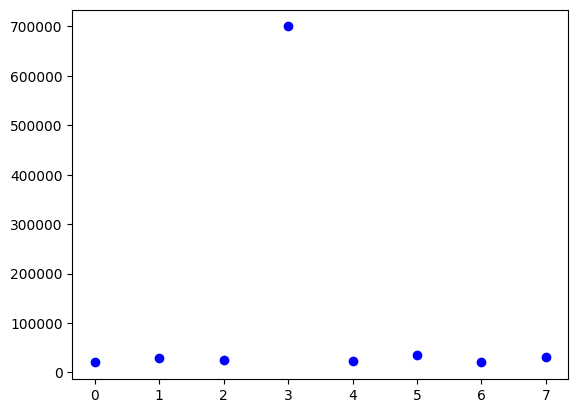

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(np.arange(8), income.flatten(), 'bo')

*Краткие комментарии по коду:*

* `%matplotlib inline` – магическая строка (это официальное название, *magic line*), которая сообщает Jupyter, что график должен быть построен прямо в этом ipynb-файле, не в отдельном окне, и отображён явно, сразу после ячейки с кодом;

* во второй строке из библиотеки `matplotlib` мы импортируем модуль `pyplot` с сокращённым названием `plt`;

* в функции `plot()` мы сначала указываем значения по оси `x` (номер наблюдения в нашем случае, сгенерированный с помощью `arange()`), а затем – значения по оси `y` (значения дохода, которые мы превратили в «плоский» массив);

* опция `bo` отвечает за цвет и тип маркера для точек: `b` – от *blue*, синие точки, `o` – круглые точки.

Аналогичным образом построим график для логарифмированных значений дохода:

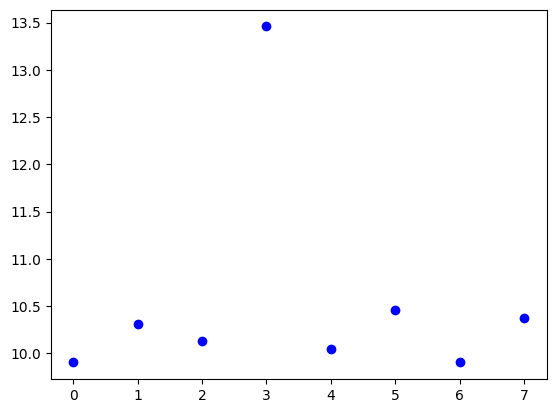

In [5]:
plt.plot(np.arange(8), np.log(income).flatten(), 'bo')

По первому графику сложно делать какие-то выводы. Из-за того, что одна точка сильно отличается от остальных, картинка получается очень растянутой, и кажется, что все значения дохода, кроме самого большого, находятся примерно на одном уровне – менее 100 тысяч. Это, конечно, правда, все значения в `income`, кроме одного, менее 100 тысяч, но понять, насколько сильно одно значение отличается от другого, по такому графику сложновато. На втором графике картина меняется: теперь разница между значениями дохода более заметна. Например, по графику чётко видно, что доход второго человека в массиве выше, чем у первого, но ниже, чем у третьего, доходы третьего и пятого человека совпадают, и так далее. При этом важно, что при логарифмировании порядок значений, «природа» данных сохранилась: что в исходном массиве `income` минимальная заработная плата была у шестого человека, а максимальная – у четвёртого, то осталось и в новом массиве.

От содержательных аспектов визуализации и анализа данных давайте вернёмся к техническим и посмотрим, как создавать новые списки на основе старых. Причём сейчас речь пойдёт именно о списках Python, о структуре данных, которая называется *list* (иногда слова «список» и массив в программировании отождествляют, но сейчас мы поговорим о списке в узком смысле). Допустим, у нас есть список, и мы хотим возвести его значения в квадрат: 

In [7]:
L = [2, 6, 7, 1]
L ** 2 # не получается

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Ничего не получилось. Как быть? В таких случаях нам пригодятся специальные конструкции – генераторы списков или списковые включения (*list comprehensions*). Давайте сначала запишем код, а потом разберём его по частям.

In [8]:
L_sq = [i ** 2 for i in L]
L_sq

[4, 36, 49, 1]

Для тех, кто знаком с циклами, строка кода выше могла показаться знакомой. Действительно, в этой задаче мы как раз сталкиваемся с необходимостью выполнять повторяющиеся действия – возводить в квадрат каждый элемент списка `L` по очереди. Как устроена приведённая выше конструкция?

* Часть `i ** 2`: каким-то образом мы обозначаем элемент списка, с которым мы будем работать (список, по которому мы будем «бегать», переходя от одного элемента к другому), и указываем, какое действие с этим элементом надо сделать; здесь мы назвали  элемент `i` и сообщили, что его нужно будет возводить в квадрат.

* Часть `for i in L`: указываем, по какому списку мы будем «бегать», переходя от одного элемента к другому, чтобы достичь цели – возвести все элементы интересующего нас списка в квадрат; расшифровывается как «для каждого элемента `i` в списке `L`сделай что-то».

* Обе части вместе: сначала указываем, что с элементом старого списка нужно сделать, потом – с каким списком мы работаем; затем, так как результат выполнения операций – новый список, заключаем всю конструкцию в квадратные скобки.

Давайте для закрепления рассмотрим ещё несколько примеров.

In [9]:
L_log = [np.log(num) for num in L ]
L_log

[0.6931471805599453, 1.791759469228055, 1.9459101490553132, 0.0]

In [10]:
L_sqrt = [np.sqrt(j) for j in L]
L_sqrt

[1.4142135623730951, 2.449489742783178, 2.6457513110645907, 1.0]